# Data exploration with the Iris dataset

Import the required Python libraries

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_iris = pd.read_csv('/content/drive/My Drive/IAAE/data/iris.data.txt')

### What's in the data?

In [4]:
df_iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


`shape` give us the number of rows (150) and columns (5).

In [5]:
df_iris.shape

(150, 5)

### Browsing the data

Pandas offer multiple ways of selecting rows and columns

In [6]:
df_iris[['sepal-width','class']]

,sepal-width,class
0,3.5,Iris-setosa
1,3.0,Iris-setosa
2,3.2,Iris-setosa
3,3.1,Iris-setosa
4,3.6,Iris-setosa
...,...,...
145,3.0,Iris-virginica
146,2.5,Iris-virginica
147,3.0,Iris-virginica
148,3.4,Iris-virginica


In [7]:
df_iris['petal-width']<1

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: petal-width, Length: 150, dtype: bool

In [8]:
df_iris_width1 = df_iris[df_iris['petal-width']<1]

In [9]:
df_iris_width1.loc[5:10,'class']

5     Iris-setosa
6     Iris-setosa
7     Iris-setosa
8     Iris-setosa
9     Iris-setosa
10    Iris-setosa
Name: class, dtype: object

In [10]:
df_iris[df_iris['sepal-width']==max(df_iris['sepal-width'])]

,sepal-length,sepal-width,petal-length,petal-width,class
15,5.7,4.4,1.5,0.4,Iris-setosa


### Basic statistics and data types

With the `info` method we can check the data type of each column. Type `object` is typically for non-numerical data.

If necessary, we can convert columns to different data types.

Comparing the total entries and the non-null counts we can detect missing values.

In [11]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


`describe` provides a set of basic statistics for each column. By default, only shows numerical columns.

The min and max can help to detect outliers.

The count shows if there are missing values in some column.

In [12]:
df_iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can add an option forcing `describe` to show only information for `object` data type columns. 

In [13]:
df_iris.describe(include='object')

,class
count,150
unique,3
top,Iris-setosa
freq,50


`class` is a categorical variable that has 3 values. `value_counts` shows the frequency of each value for a given column.

In [14]:
df_iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### Some examples of visualization (univariate)

For these examples we will use the `seaborn` graphical library and the `pyplot` library.

With `pyplot` we define a grid of 2x2 as a container.

The histograms for the numerical columns are obtained with `seaborn`.

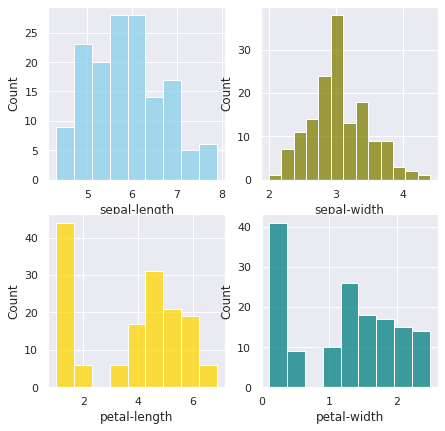

In [15]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df_iris, x="sepal-length", color="skyblue", ax=axs[0, 0]);
sns.histplot(data=df_iris, x="sepal-width", color="olive", ax=axs[0, 1]);
sns.histplot(data=df_iris, x="petal-length", color="gold", ax=axs[1, 0]);
sns.histplot(data=df_iris, x="petal-width", color="teal", ax=axs[1, 1]);

`seaborn` provides boxplot plotting functionality.

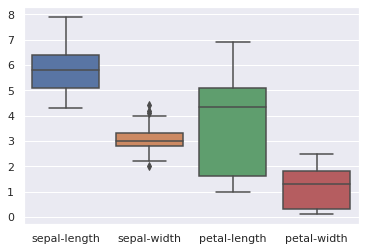

In [16]:
sns.boxplot(data=df_iris);

### Some examples of visualization (bivariate)

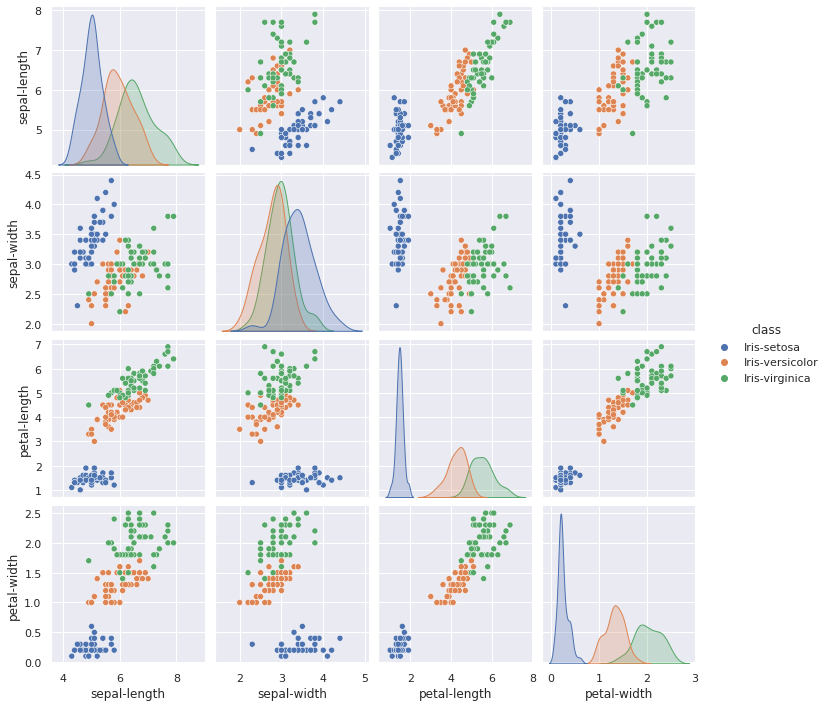

In [17]:
sns.pairplot(df_iris, hue='class');

If we want to graphically represent correlations between columns, first we use the `corr` method to compute them

In [18]:
corr_iris = df_iris.corr()

In [19]:
corr_iris

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


Then, we use these correlations as a parameter for `heatmap`.

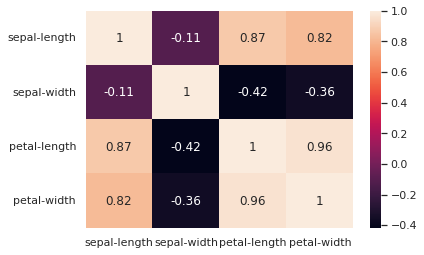

In [20]:
sns.heatmap(corr_iris, annot=True);